## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [107]:
# Your code here - remember to use markdown cells for comments as well!
%ls

 Volume in drive C has no label.
 Volume Serial Number is 1658-7586

 Directory of c:\Users\DJ\OneDrive - Zero Eyes\DJ\Flatiron\phase_2\project_2\dsc-phase-2-djrachjake

02/13/2023  11:02 AM    <DIR>          .
02/10/2023  12:34 PM    <DIR>          ..
02/10/2023  12:34 PM               163 .canvas
02/10/2023  12:34 PM                70 .gitignore
02/10/2023  12:34 PM             1,846 CONTRIBUTING.md
02/10/2023  12:34 PM    <DIR>          data
02/13/2023  04:55 PM           893,314 dj.ipynb
02/10/2023  12:34 PM         2,930,391 halfway-there.gif
02/13/2023  11:02 AM           328,458 jake.ipynb
02/10/2023  12:34 PM             1,354 LICENSE.md
02/10/2023  12:34 PM            17,557 README.md
02/10/2023  12:34 PM             1,022 student.ipynb
               9 File(s)      4,174,175 bytes
               3 Dir(s)  241,101,197,312 bytes free


In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

plt.style.use('seaborn-notebook')

In [109]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [111]:
(df.isna().sum().sort_values(ascending=False))/len(df)

heat_source      0.001061
sewer_system     0.000464
id               0.000000
grade            0.000000
lat              0.000000
address          0.000000
yr_renovated     0.000000
yr_built         0.000000
sqft_patio       0.000000
sqft_garage      0.000000
sqft_basement    0.000000
sqft_above       0.000000
condition        0.000000
date             0.000000
view             0.000000
nuisance         0.000000
greenbelt        0.000000
waterfront       0.000000
floors           0.000000
sqft_lot         0.000000
sqft_living      0.000000
bathrooms        0.000000
bedrooms         0.000000
price            0.000000
long             0.000000
dtype: float64

In [112]:
zips = pd.DataFrame([int(x[-20:-15]) for x in df['address']])
df['zipcode'] = zips
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,zipcode
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [113]:
goodzips = []
for key, value in df['zipcode'].value_counts().items():
    if value > 100:
        goodzips.append(key)
    else:
        continue
len(goodzips)
df = df[df['zipcode'].isin(goodzips) == True]

In [114]:
df['ppsq_living'] = (df['price']/df['sqft_living']).round(2)

C:\Users\DJ\AppData\Local\Temp\ipykernel_3216\4024128699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ppsq_living'] = (df['price']/df['sqft_living']).round(2)


In [115]:
df['ppsq_lot'] = (df['price']/df['sqft_lot']).round(2) #feature engineering lot price per square ft

C:\Users\DJ\AppData\Local\Temp\ipykernel_3216\3796027500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ppsq_lot'] = (df['price']/df['sqft_lot']).round(2) #feature engineering lot price per square ft


In [116]:
df = df[df['sqft_living'] > 400] #dropping all tiny homes from the data set

In [117]:
for x in df[['waterfront', 'greenbelt', 'nuisance']]: # converting YES and NO to 1 and 0
    df[x] = df[x].replace("NO", 0).replace("YES", 1)

In [118]:
df.drop(['address', 'lat', 'long'], axis=1, inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,zipcode,ppsq_living,ppsq_lot
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,0,0,...,PUBLIC,1180,0,0,40,1969,0,98055,572.03,94.54
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,0,0,...,PUBLIC,1570,1570,0,240,1950,0,98133,332.13,137.25
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,0,0,...,PUBLIC,1580,1580,0,0,1956,0,98178,107.99,50.52
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,0,0,...,PUBLIC,1090,1070,200,270,2010,0,98118,358.80,553.57
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,0,0,...,PUBLIC,1120,550,550,30,2012,0,98027,529.02,781.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,9376300851,10/7/2021,719000.0,3,2.5,1270,1141,2.0,0,0,...,PUBLIC,1050,420,200,60,2007,0,98117,566.14,630.15
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,0,0,...,PUBLIC,1600,1130,0,210,1921,0,98103,814.14,388.75
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,0,0,...,PUBLIC,2020,0,0,520,2011,0,98116,650.00,226.38
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,0,0,...,PUBLIC,940,920,240,110,1995,0,98122,493.83,222.22


In [119]:
iqrprice = np.percentile(df['price'], 75) -np.percentile(df['price'], 25) ##calculating the upper and lower limits for outliers using iqr*1.5
lower_lim_price =np.percentile(df['price'], 25) - 1.5*iqrprice
upper_lim_price =np.percentile(df['price'], 75) + 1.5*iqrprice
print(f'anything above {upper_lim_price} and below {lower_lim_price} is an outlier')

anything above 2300625.0 and below -340375.0 is an outlier


In [120]:
df = df[df['price'] < 2300625.0] #filtering out the outliers based the above

In [121]:
iqrbedrooms = np.percentile(df['bedrooms'], 75) -np.percentile(df['bedrooms'], 25) ##calculating the upper and lower limits for outliers using iqr*1.5
lower_lim_bedrooms =np.percentile(df['bedrooms'], 25) - 1.5*iqrbedrooms
upper_lim_bedrooms =np.percentile(df['bedrooms'], 75) + 1.5*iqrbedrooms
print(f'anything above {upper_lim_bedrooms} and below {lower_lim_bedrooms} is an outlier')

anything above 5.5 and below 1.5 is an outlier


In [122]:
df.drop(['id', 'date', 'yr_renovated'], axis=1, inplace=True)

C:\Users\DJ\AppData\Local\Temp\ipykernel_3216\147732442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['id', 'date', 'yr_renovated'], axis=1, inplace=True)


In [123]:
df_new = df[df['yr_built'] >= 2013]
df_new.shape

(3487, 22)

In [124]:
df_new['avg_price'] = df_new['price'].mean()
X = df_new['avg_price']
y = df_new['price']
dummy_model = sm.OLS(y, sm.add_constant(X))
dummy_model.fit().summary()  

C:\Users\DJ\AppData\Local\Temp\ipykernel_3216\3969561752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['avg_price'] = df_new['price'].mean()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 14 Feb 2023   Prob (F-statistic):                nan
Time:                        11:26:05   Log-Likelihood:                -50223.
No. Observations:                3487   AIC:                         1.004e+05
Df Residuals:                    3486   BIC:                         1.005e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
avg_price      1.0000      0.007    139.635      0.000       0.986       1.014
==============================================================================
Omnibus:                      462.309   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              662.589
Skew:                           1.049   Prob(JB):                    1.32e-144
Kurtosis:                       3.396   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
df_new.drop('condition', axis=1, inplace=True)

C:\Users\DJ\AppData\Local\Temp\ipykernel_3216\3756891142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop('condition', axis=1, inplace=True)


In [126]:
df_new['lot_home_ratio'] = (df_new['sqft_living']/df_new['sqft_lot']).round(2)

C:\Users\DJ\AppData\Local\Temp\ipykernel_3216\2760007641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['lot_home_ratio'] = (df_new['sqft_living']/df_new['sqft_lot']).round(2)


In [127]:
source = []
df_new.reset_index(inplace=True)
for heat in df_new['heat_source']:
    if heat == 'Electricity/Solar' or heat == 'Gas/Solar':
        source.append('Solar')
    else:
        source.append(heat)
    source_df = pd.DataFrame(source)
    df_new['heat_source_2'] = source_df

C:\Users\DJ\AppData\Local\Temp\ipykernel_3216\2249052927.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['heat_source_2'] = source_df


In [128]:
dummy_heat = pd.get_dummies(df_new['heat_source_2'])
dummy_heat.corrwith(df_new['price'])

Electricity   -0.233891
Gas            0.240465
Oil            0.000709
Other         -0.018441
Solar         -0.035869
dtype: float64

In [129]:
dummy_heat_df = pd.concat([df_new, dummy_heat], axis=1)
dummy_heat_df.corr()['price'].sort_values(ascending=False)

price             1.000000
sqft_living       0.584544
sqft_above        0.504575
bathrooms         0.478551
bedrooms          0.423555
ppsq_living       0.381096
sqft_garage       0.358359
sqft_basement     0.257713
Gas               0.240465
sqft_patio        0.229328
greenbelt         0.128112
sqft_lot          0.122000
waterfront        0.071921
Oil               0.000709
Other            -0.018441
index            -0.022120
nuisance         -0.025172
Solar            -0.035869
yr_built         -0.095147
ppsq_lot         -0.102293
zipcode          -0.135847
floors           -0.153045
Electricity      -0.233891
lot_home_ratio   -0.271216
avg_price              NaN
Name: price, dtype: float64

In [130]:
df_new = pd.concat([df_new, dummy_heat], axis=1)

In [131]:
garage_no_garage = []
for item in df_new['sqft_garage']:
    if item > 0:
        garage_no_garage.append(1)
    else:
        garage_no_garage.append(0)
df_new['garage'] = pd.DataFrame(garage_no_garage)

In [132]:
basement_no_basement = []
for item in df_new['sqft_basement']:
    if item > 0:
        basement_no_basement.append(1)
    else:
        basement_no_basement.append(0)
df_new['basement'] = pd.DataFrame(basement_no_basement)

In [133]:
patio_no_patio = []
for item in df_new['sqft_patio']:
    if item > 0:
        patio_no_patio.append(1)
    else:
        patio_no_patio.append(0)
df_new['patio'] = pd.DataFrame(patio_no_patio)

In [231]:
df_new

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,lot_home_ratio,heat_source_2,Electricity,Gas,Oil,Other,Solar,garage,basement,patio
0,7,820000.0,3,2.5,2214,3506,2.0,0,0,0,...,0.63,Gas,0,1,0,0,0,1,0,1
1,13,828000.0,4,3.0,3170,6343,2.0,0,0,0,...,0.50,Gas,0,1,0,0,0,1,0,1
2,18,739950.0,2,2.0,1000,1414,3.0,0,0,0,...,0.71,Electricity,1,0,0,0,0,0,0,1
3,31,730000.0,3,2.0,1570,1184,3.0,0,0,0,...,1.33,Electricity,1,0,0,0,0,1,1,1
4,32,670000.0,3,2.5,1530,955,2.0,0,0,0,...,1.60,Gas,0,1,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,30092,345629.0,3,3.5,1430,1078,2.0,0,0,1,...,1.33,Electricity,1,0,0,0,0,0,1,1
3483,30095,871567.0,4,3.0,3120,5913,2.0,0,0,0,...,0.53,Gas,0,1,0,0,0,1,0,1
3484,30099,775000.0,3,2.5,1400,2261,2.0,0,0,0,...,0.62,Gas,0,1,0,0,0,1,1,1
3485,30103,783402.0,2,2.0,1910,5850,1.0,0,0,0,...,0.33,Gas,0,1,0,0,0,1,0,1


<AxesSubplot:xlabel='yr_built', ylabel='Count'>

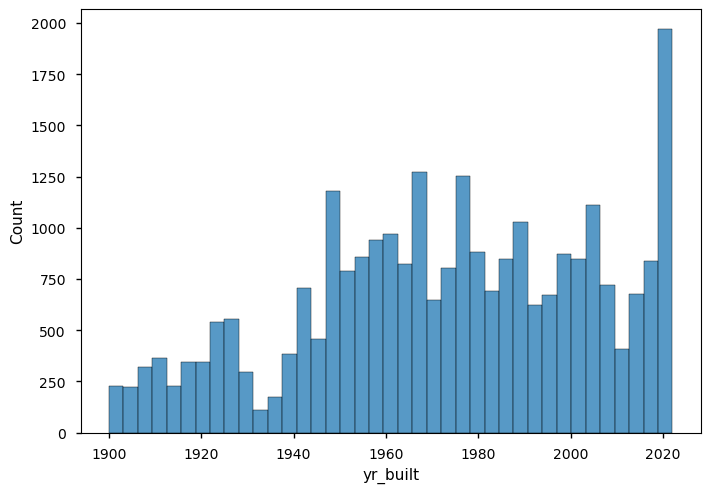

In [135]:
sns.histplot(df['yr_built'])

<AxesSubplot:>

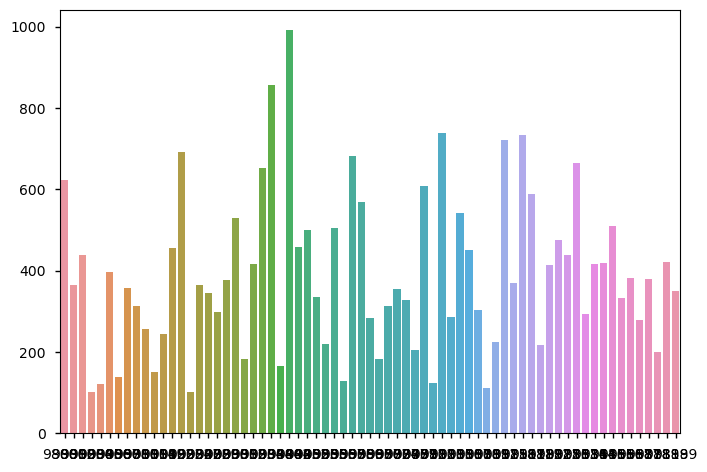

In [136]:
sns.barplot(x = df['zipcode'].value_counts().index, y=df['zipcode'].value_counts().values)

In [137]:
df['sewer_system'].value_counts()

PUBLIC                23012
PRIVATE                3988
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

In [138]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'zipcode', 'ppsq_living',
       'ppsq_lot'],
      dtype='object')

In [139]:
df['grade'].value_counts().sort_index()

10 Very Good       750
11 Excellent       107
12 Luxury           11
13 Mansion           1
2 Substandard        1
3 Poor               9
4 Low               38
5 Fair             363
6 Low Average     2779
7 Average        11311
8 Good            8619
9 Better          3025
Name: grade, dtype: int64

In [140]:
df.loc[df['grade'] == '1 Cabin']

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,zipcode,ppsq_living,ppsq_lot


In [141]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'zipcode', 'ppsq_living',
       'ppsq_lot'],
      dtype='object')

In [142]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,zipcode,ppsq_living,ppsq_lot
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,NONE,...,Gas,PUBLIC,1180,0,0,40,1969,98055,572.03,94.54
1,920000.0,5,2.5,2770,6703,1.0,0,0,1,AVERAGE,...,Oil,PUBLIC,1570,1570,0,240,1950,98133,332.13,137.25
2,311000.0,6,2.0,2880,6156,1.0,0,0,0,AVERAGE,...,Gas,PUBLIC,1580,1580,0,0,1956,98178,107.99,50.52
3,775000.0,3,3.0,2160,1400,2.0,0,0,0,AVERAGE,...,Gas,PUBLIC,1090,1070,200,270,2010,98118,358.80,553.57
4,592500.0,2,2.0,1120,758,2.0,0,0,1,NONE,...,Electricity,PUBLIC,1120,550,550,30,2012,98027,529.02,781.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,719000.0,3,2.5,1270,1141,2.0,0,0,0,NONE,...,Gas,PUBLIC,1050,420,200,60,2007,98117,566.14,630.15
30150,1555000.0,5,2.0,1910,4000,1.5,0,0,0,NONE,...,Oil,PUBLIC,1600,1130,0,210,1921,98103,814.14,388.75
30151,1313000.0,3,2.0,2020,5800,2.0,0,0,0,FAIR,...,Gas,PUBLIC,2020,0,0,520,2011,98116,650.00,226.38
30152,800000.0,3,2.0,1620,3600,1.0,0,0,1,NONE,...,Gas,PUBLIC,940,920,240,110,1995,98122,493.83,222.22


In [143]:
price_zipcode = df.groupby('zipcode').mean()['ppsq_living'].sort_values(ascending=False)

In [144]:
df['ppsq_living'].mean()

503.28997038572544

<AxesSubplot:xlabel='zipcode'>

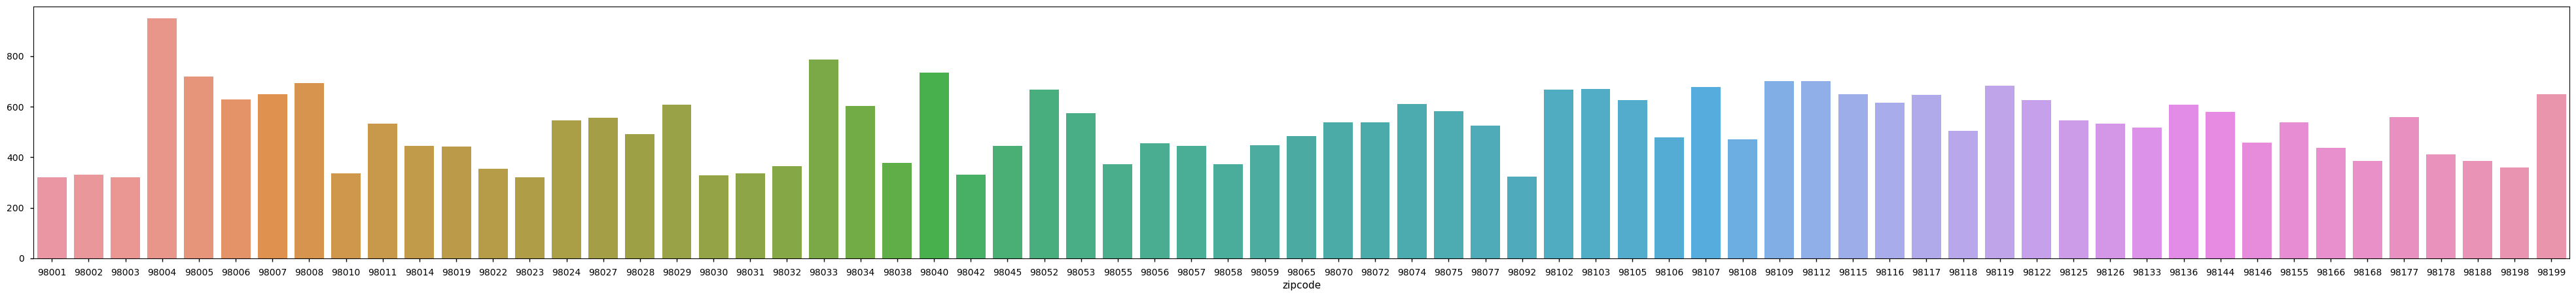

In [145]:
fig, ax = plt.subplots(figsize=(50, 5))

sns.barplot(x=price_zipcode.index, y=price_zipcode.values)

In [146]:
df[df['zipcode'] == 98019].sort_values('ppsq_living', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,zipcode,ppsq_living,ppsq_lot
26052,1750000.0,4,1.0,1080,117346,1.5,0,0,1,AVERAGE,...,Oil,PRIVATE,1080,720,0,50,1941,98019,1620.37,14.91
27213,1125000.0,1,1.0,860,426779,1.0,0,0,0,NONE,...,NaN,PRIVATE,860,0,0,100,1980,98019,1308.14,2.64
22729,720000.0,2,1.0,670,14136,1.0,1,0,0,GOOD,...,Electricity,PRIVATE,670,0,0,290,1963,98019,1074.63,50.93
7860,1370000.0,1,1.0,1620,199940,1.5,0,0,1,NONE,...,Electricity,PRIVATE,1620,0,0,0,1958,98019,845.68,6.85
13398,870000.0,3,1.0,1100,8376,1.0,0,0,0,NONE,...,Gas,PUBLIC,1100,0,0,260,1912,98019,790.91,103.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4698,509016.0,4,3.5,2130,1819,2.0,0,0,0,NONE,...,Gas,PUBLIC,1750,980,500,140,2021,98019,238.97,279.83
19518,750000.0,4,2.5,3460,921729,2.0,0,0,0,GOOD,...,Electricity,PRIVATE,3460,0,440,130,1995,98019,216.76,0.81
14864,425000.0,3,2.0,2030,7670,2.0,0,0,0,NONE,...,Oil,PUBLIC,1230,800,0,310,1949,98019,209.36,55.41
12915,479301.0,5,2.5,3380,9358,2.0,0,0,0,NONE,...,Gas,PUBLIC,3380,0,540,0,2003,98019,141.81,51.22


In [147]:
df.sort_values('ppsq_living', ascending=False).head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,zipcode,ppsq_living,ppsq_lot
22280,2200000.0,1,1.0,530,4544,1.0,1,0,1,EXCELLENT,...,Electricity,PUBLIC,530,0,0,950,1941,98107,4150.94,484.15
7947,1620000.0,1,1.0,460,8909,1.0,0,0,0,NONE,...,Electricity,PUBLIC,460,0,0,110,1948,98155,3521.74,181.84
27671,1650000.0,1,1.0,470,4121,1.0,0,0,0,NONE,...,Electricity,PUBLIC,470,0,0,0,1924,98125,3510.64,400.39
5027,1875000.0,1,1.0,560,16424,1.0,1,0,0,EXCELLENT,...,Electricity,PUBLIC,560,0,0,200,1945,98008,3348.21,114.16
19581,1625000.0,1,1.0,490,56407,1.0,1,0,0,AVERAGE,...,Electricity,PRIVATE,490,0,0,0,1929,98059,3316.33,28.81
20704,2200000.0,1,1.5,670,5510,2.0,0,0,0,NONE,...,Gas,PUBLIC,670,0,0,0,2017,98103,3283.58,399.27
2616,1358500.0,1,1.0,440,30500,1.0,1,0,0,AVERAGE,...,Electricity,PRIVATE,440,0,0,160,1950,98024,3087.50,44.54
3674,2200000.0,2,1.0,740,13639,1.0,0,0,1,AVERAGE,...,Electricity,PUBLIC,740,0,0,0,1959,98004,2972.97,161.30
13718,1894000.0,2,1.0,660,5000,1.0,0,0,1,NONE,...,Gas,PUBLIC,660,660,0,0,1917,98107,2869.70,378.80
26981,1200000.0,1,1.0,420,4480,1.0,0,0,0,NONE,...,Electricity,PUBLIC,420,270,0,0,1918,98136,2857.14,267.86


In [148]:
df['sqft_living'].describe()

count    27014.000000
mean      2010.648293
std        801.950357
min        410.000000
25%       1410.000000
50%       1890.000000
75%       2490.000000
max       8020.000000
Name: sqft_living, dtype: float64

In [149]:
pricelot_zipcode = df.groupby('zipcode').mean()['ppsq_lot'].sort_values(ascending=False)

<AxesSubplot:xlabel='zipcode'>

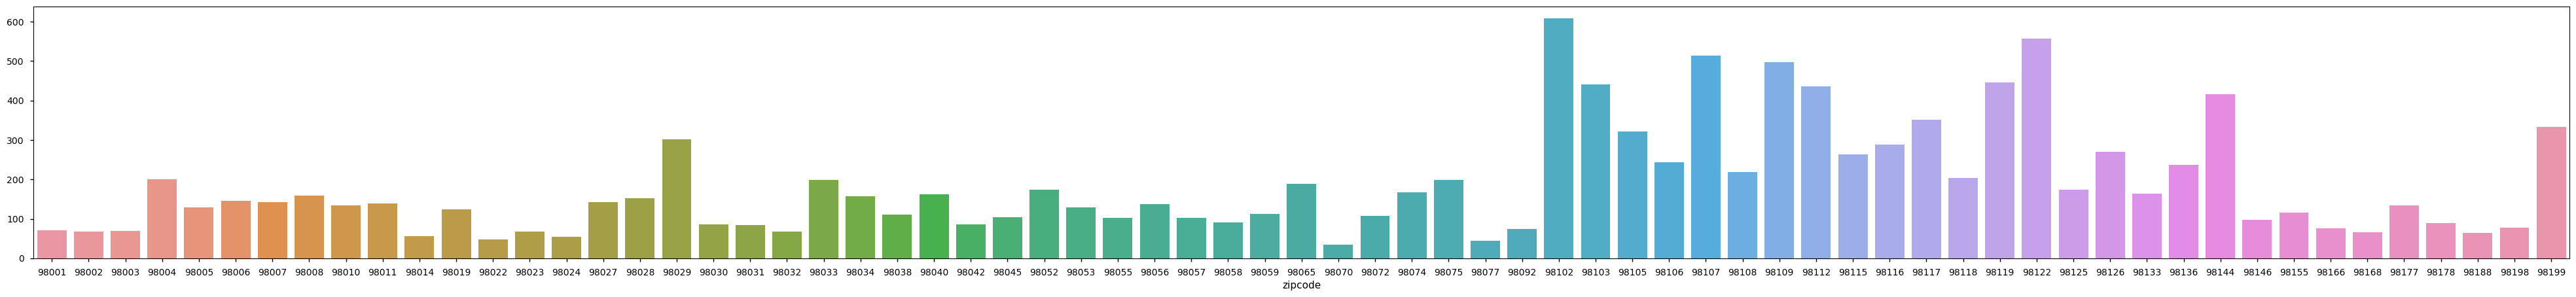

In [150]:
fig, ax = plt.subplots(figsize=(50, 5))

sns.barplot(x=pricelot_zipcode.index, y=pricelot_zipcode.values)

In [151]:
df['sewer_system'].value_counts()

PUBLIC                23012
PRIVATE                3988
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

In [152]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.566396
ppsq_living      0.488338
sqft_above       0.479289
bathrooms        0.437586
bedrooms         0.314319
sqft_patio       0.248916
sqft_garage      0.234004
floors           0.220224
ppsq_lot         0.212681
sqft_basement    0.202424
greenbelt        0.108621
yr_built         0.088376
sqft_lot         0.075333
waterfront       0.035027
nuisance        -0.016071
zipcode         -0.052313
Name: price, dtype: float64

In [153]:
df[['waterfront', 'greenbelt', 'nuisance']].sum()/len(df)

waterfront    0.011846
greenbelt     0.024691
nuisance      0.170541
dtype: float64

In [154]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'zipcode', 'ppsq_living',
       'ppsq_lot'],
      dtype='object')

In [155]:
df['view'].value_counts(normalize=True)

NONE         0.897275
AVERAGE      0.060968
GOOD         0.024987
EXCELLENT    0.010402
FAIR         0.006367
Name: view, dtype: float64

In [156]:
0.018588*len(df)

502.136232

In [157]:
df.groupby('view').mean()['price'].sort_values(ascending=False)

view
EXCELLENT    1.338820e+06
GOOD         1.260112e+06
FAIR         1.238091e+06
AVERAGE      1.155807e+06
NONE         9.230378e+05
Name: price, dtype: float64

In [158]:
df['price'].describe()

count    2.701400e+04
mean     9.519827e+05
std      4.429122e+05
min      2.756300e+04
25%      6.320000e+05
50%      8.400000e+05
75%      1.200000e+06
max      2.300000e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

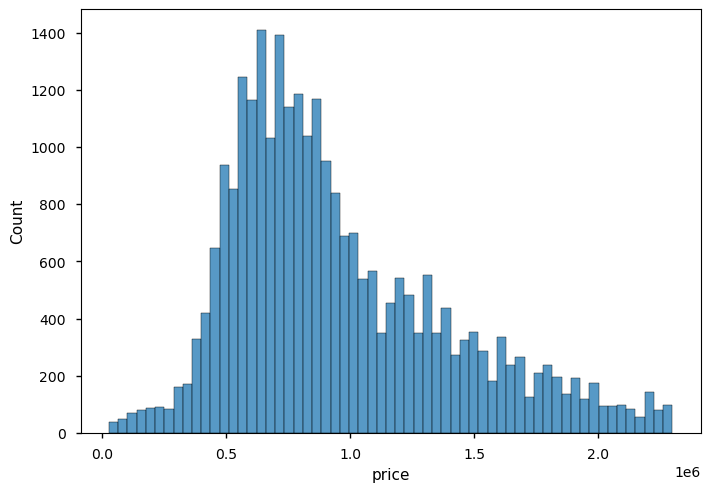

In [159]:
sns.histplot(df['price'])

c:\Users\DJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

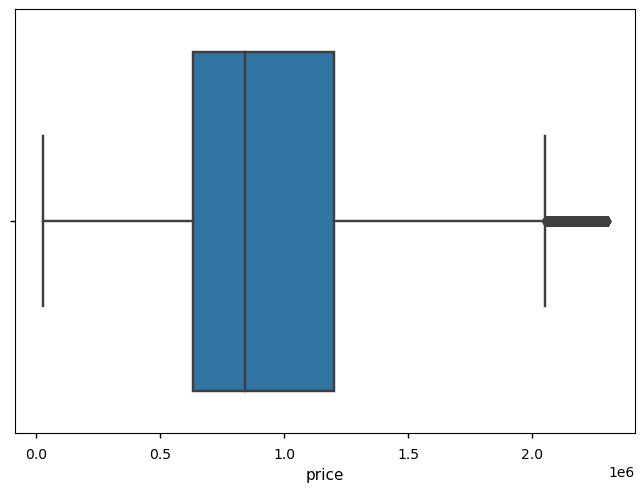

In [160]:
sns.boxplot(df['price'])

In [161]:
df.shape

(27014, 22)

c:\Users\DJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

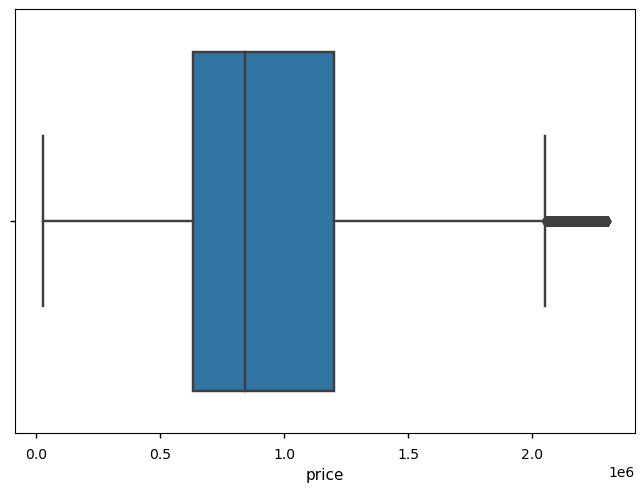

In [162]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

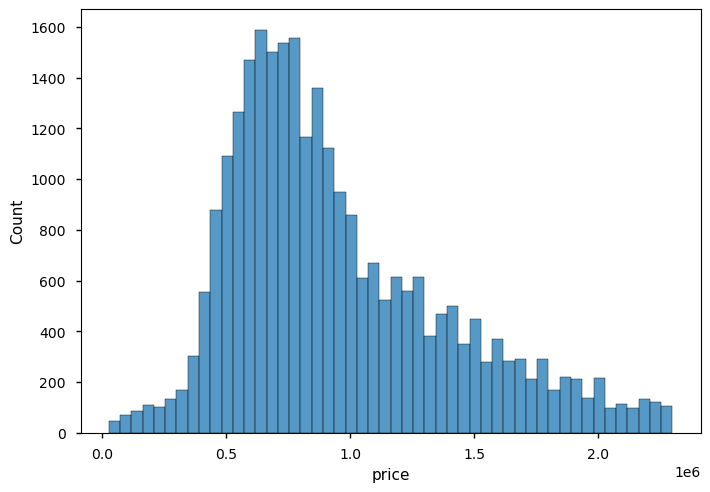

In [163]:
sns.histplot(df['price'], bins=50)

In [164]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,zipcode,ppsq_living,ppsq_lot
0,675000.0,4,1.0,1180,7140,1.0,0,0,0,NONE,...,Gas,PUBLIC,1180,0,0,40,1969,98055,572.03,94.54
1,920000.0,5,2.5,2770,6703,1.0,0,0,1,AVERAGE,...,Oil,PUBLIC,1570,1570,0,240,1950,98133,332.13,137.25
2,311000.0,6,2.0,2880,6156,1.0,0,0,0,AVERAGE,...,Gas,PUBLIC,1580,1580,0,0,1956,98178,107.99,50.52
3,775000.0,3,3.0,2160,1400,2.0,0,0,0,AVERAGE,...,Gas,PUBLIC,1090,1070,200,270,2010,98118,358.80,553.57
4,592500.0,2,2.0,1120,758,2.0,0,0,1,NONE,...,Electricity,PUBLIC,1120,550,550,30,2012,98027,529.02,781.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30149,719000.0,3,2.5,1270,1141,2.0,0,0,0,NONE,...,Gas,PUBLIC,1050,420,200,60,2007,98117,566.14,630.15
30150,1555000.0,5,2.0,1910,4000,1.5,0,0,0,NONE,...,Oil,PUBLIC,1600,1130,0,210,1921,98103,814.14,388.75
30151,1313000.0,3,2.0,2020,5800,2.0,0,0,0,FAIR,...,Gas,PUBLIC,2020,0,0,520,2011,98116,650.00,226.38
30152,800000.0,3,2.0,1620,3600,1.0,0,0,1,NONE,...,Gas,PUBLIC,940,920,240,110,1995,98122,493.83,222.22


In [165]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.566396
ppsq_living      0.488338
sqft_above       0.479289
bathrooms        0.437586
bedrooms         0.314319
sqft_patio       0.248916
sqft_garage      0.234004
floors           0.220224
ppsq_lot         0.212681
sqft_basement    0.202424
greenbelt        0.108621
yr_built         0.088376
sqft_lot         0.075333
waterfront       0.035027
nuisance        -0.016071
zipcode         -0.052313
Name: price, dtype: float64

In [166]:
viewdummy = pd.get_dummies(df['view'], drop_first=True, prefix='view')
viewdata = pd.concat([df['price'],viewdummy], axis=1)
viewdata.corr()['price'].sort_values(ascending=False)

price             1.000000
view_GOOD         0.111372
view_EXCELLENT    0.089546
view_FAIR         0.051710
view_NONE        -0.193148
Name: price, dtype: float64

In [167]:
X_ohe = sm.add_constant( viewdata.drop(['price'], axis=1))

all_mod = sm.OLS(viewdata['price'], X_ohe)

all_results = all_mod.fit()
print(all_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     277.2
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          6.16e-234
Time:                        11:26:10   Log-Likelihood:            -3.8900e+05
No. Observations:               27014   AIC:                         7.780e+05
Df Residuals:                   27009   BIC:                         7.781e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.156e+06   1.07e+04    108.

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

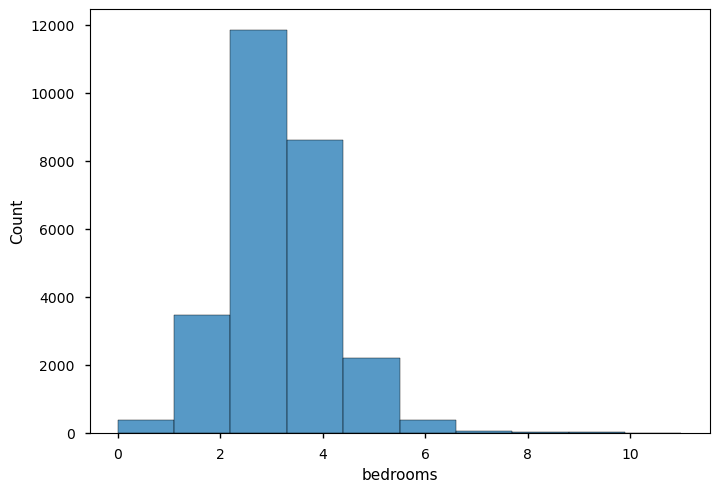

In [168]:
sns.histplot(df['bedrooms'], bins=10)

In [169]:
pricebybedrooms=df.groupby('bedrooms').mean()['price'].sort_index()

<AxesSubplot:xlabel='bedrooms'>

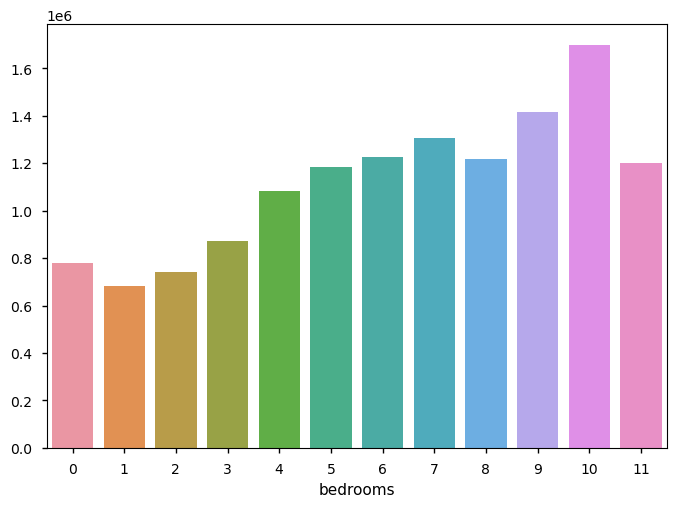

In [170]:
sns.barplot(x=pricebybedrooms.index, y=pricebybedrooms.values)

c:\Users\DJ\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms'>

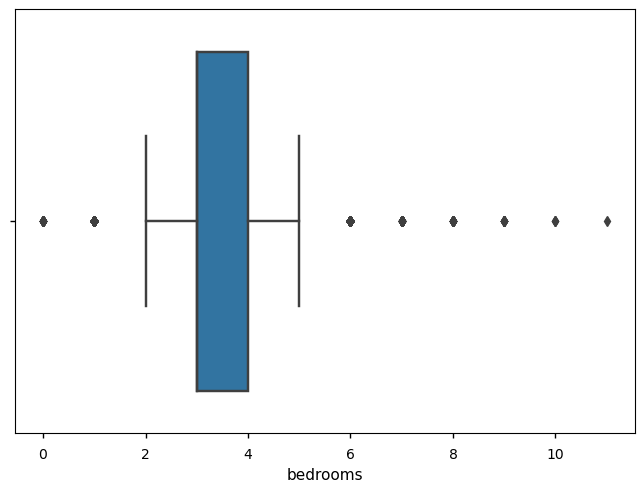

In [171]:
sns.boxplot(df['bedrooms'])

In [172]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'zipcode', 'ppsq_living',
       'ppsq_lot'],
      dtype='object')

In [173]:
df['heat_source'].value_counts()

Gas                  18390
Electricity           5666
Oil                   2788
Gas/Solar               76
Electricity/Solar       55
Other                   16
Oil/Solar                4
Name: heat_source, dtype: int64

In [174]:
#sns.pairplot(df)

In [175]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.566396
ppsq_living      0.488338
sqft_above       0.479289
bathrooms        0.437586
bedrooms         0.314319
sqft_patio       0.248916
sqft_garage      0.234004
floors           0.220224
ppsq_lot         0.212681
sqft_basement    0.202424
greenbelt        0.108621
yr_built         0.088376
sqft_lot         0.075333
waterfront       0.035027
nuisance        -0.016071
zipcode         -0.052313
Name: price, dtype: float64

In [176]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'zipcode', 'ppsq_living',
       'ppsq_lot'],
      dtype='object')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27014 entries, 0 to 30153
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          27014 non-null  float64
 1   bedrooms       27014 non-null  int64  
 2   bathrooms      27014 non-null  float64
 3   sqft_living    27014 non-null  int64  
 4   sqft_lot       27014 non-null  int64  
 5   floors         27014 non-null  float64
 6   waterfront     27014 non-null  int64  
 7   greenbelt      27014 non-null  int64  
 8   nuisance       27014 non-null  int64  
 9   view           27014 non-null  object 
 10  condition      27014 non-null  object 
 11  grade          27014 non-null  object 
 12  heat_source    26995 non-null  object 
 13  sewer_system   27007 non-null  object 
 14  sqft_above     27014 non-null  int64  
 15  sqft_basement  27014 non-null  int64  
 16  sqft_garage    27014 non-null  int64  
 17  sqft_patio     27014 non-null  int64  
 18  yr_bui

In [178]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.566396
ppsq_living      0.488338
sqft_above       0.479289
bathrooms        0.437586
bedrooms         0.314319
sqft_patio       0.248916
sqft_garage      0.234004
floors           0.220224
ppsq_lot         0.212681
sqft_basement    0.202424
greenbelt        0.108621
yr_built         0.088376
sqft_lot         0.075333
waterfront       0.035027
nuisance        -0.016071
zipcode         -0.052313
Name: price, dtype: float64

In [179]:
df['nuisance'].value_counts()

0    22407
1     4607
Name: nuisance, dtype: int64

In [180]:
pd.get_dummies(df).corr()['price'].sort_values(ascending=False)

price                              1.000000
sqft_living                        0.566396
ppsq_living                        0.488338
sqft_above                         0.479289
bathrooms                          0.437586
grade_9 Better                     0.336727
bedrooms                           0.314319
grade_10 Very Good                 0.266229
sqft_patio                         0.248916
sqft_garage                        0.234004
floors                             0.220224
ppsq_lot                           0.212681
sqft_basement                      0.202424
heat_source_Gas                    0.177060
grade_8 Good                       0.142734
grade_11 Excellent                 0.130744
view_AVERAGE                       0.117262
view_GOOD                          0.111372
greenbelt                          0.108621
view_EXCELLENT                     0.089546
yr_built                           0.088376
sqft_lot                           0.075333
view_FAIR                       

In [181]:
df['condition'].value_counts()

Average      16105
Good          7598
Very Good     3036
Fair           217
Poor            58
Name: condition, dtype: int64

In [182]:
df_new.corr()['price'].sort_values(ascending=False)

price             1.000000
sqft_living       0.584544
sqft_above        0.504575
bathrooms         0.478551
bedrooms          0.423555
ppsq_living       0.381096
sqft_garage       0.358359
sqft_basement     0.257713
Gas               0.240465
garage            0.239844
sqft_patio        0.229328
greenbelt         0.128112
sqft_lot          0.122000
basement          0.089256
waterfront        0.071921
patio             0.040278
Oil               0.000709
Other            -0.018441
index            -0.022120
nuisance         -0.025172
Solar            -0.035869
yr_built         -0.095147
ppsq_lot         -0.102293
zipcode          -0.135847
floors           -0.153045
Electricity      -0.233891
lot_home_ratio   -0.271216
avg_price              NaN
Name: price, dtype: float64

In [183]:
pd.get_dummies(df_new).corr()['price'].sort_values(ascending=False)

price                              1.000000
sqft_living                        0.584544
sqft_above                         0.504575
bathrooms                          0.478551
bedrooms                           0.423555
grade_9 Better                     0.392077
ppsq_living                        0.381096
sqft_garage                        0.358359
grade_10 Very Good                 0.261491
sqft_basement                      0.257713
heat_source_Gas                    0.240465
Gas                                0.240465
heat_source_2_Gas                  0.240465
garage                             0.239844
sqft_patio                         0.229328
sewer_system_PRIVATE               0.135709
view_GOOD                          0.133470
greenbelt                          0.128112
sqft_lot                           0.122000
view_AVERAGE                       0.103427
basement                           0.089256
view_FAIR                          0.073935
waterfront                      

In [184]:
df_new['grade'].value_counts()

8 Good           2088
9 Better          996
7 Average         282
10 Very Good      113
6 Low Average       5
11 Excellent        2
12 Luxury           1
Name: grade, dtype: int64

In [185]:
df_new.groupby('grade').mean()['price'].sort_values(ascending=False)

grade
11 Excellent     1.992500e+06
12 Luxury        1.700000e+06
10 Very Good     1.651567e+06
9 Better         1.299472e+06
8 Good           9.159379e+05
7 Average        6.699869e+05
6 Low Average    4.059378e+05
Name: price, dtype: float64

In [186]:
df_new.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'zipcode', 'ppsq_living',
       'ppsq_lot', 'avg_price', 'lot_home_ratio', 'heat_source_2',
       'Electricity', 'Gas', 'Oil', 'Other', 'Solar', 'garage', 'basement',
       'patio'],
      dtype='object')

In [187]:
pd.get_dummies(df['view']).corrwith(df_new['price'])

AVERAGE      0.005135
EXCELLENT    0.012846
FAIR        -0.016433
GOOD         0.009403
NONE        -0.008704
dtype: float64

In [188]:
df_new.corr()['price'].sort_values(ascending=False)

price             1.000000
sqft_living       0.584544
sqft_above        0.504575
bathrooms         0.478551
bedrooms          0.423555
ppsq_living       0.381096
sqft_garage       0.358359
sqft_basement     0.257713
Gas               0.240465
garage            0.239844
sqft_patio        0.229328
greenbelt         0.128112
sqft_lot          0.122000
basement          0.089256
waterfront        0.071921
patio             0.040278
Oil               0.000709
Other            -0.018441
index            -0.022120
nuisance         -0.025172
Solar            -0.035869
yr_built         -0.095147
ppsq_lot         -0.102293
zipcode          -0.135847
floors           -0.153045
Electricity      -0.233891
lot_home_ratio   -0.271216
avg_price              NaN
Name: price, dtype: float64

In [189]:
df_new[['bedrooms', 'bathrooms']]

,bedrooms,bathrooms
0,3,2.5
1,4,3.0
2,2,2.0
3,3,2.0
4,3,2.5
...,...,...
3482,3,3.5
3483,4,3.0
3484,3,2.5
3485,2,2.0


In [190]:
y= df_new['price']
x = sm.add_constant(df_new[['bedrooms', 'bathrooms', 'ppsq_living', 'sqft_above']])
sm.OLS(y,x).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     3435.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:26:12   Log-Likelihood:                -47435.
No. Observations:                3487   AIC:                         9.488e+04
Df Residuals:                    3482   BIC:                         9.491e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.155e+06   2.06e+04    -56.010      0.000    -1.2e+06   -1.11e+06
bedrooms     5.694e+04   5261.018     10.823      0.000    4.66e+04    6.73e+04
bathrooms    1.142e+05   6372.799     17.924      0.000    1.02e+05    1.27e+05
ppsq_living  2023.3561     21.834     92.669      0.000    1980.547    2066.165
sqft_above    330.0675      6.049     54.563      0.000     318.207     341.928
==============================================================================
Omnibus:                     2741.240   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           391272.609
Skew:                          -2.947   Prob(JB):                         0.00
Kurtosis:                      54.558   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
y= df_new['price']
x = sm.add_constant(df_new[['sqft_living', 'ppsq_living']])
sm.OLS(y,x).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 1.077e+04
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:26:12   Log-Likelihood:                -46785.
No. Observations:                3487   AIC:                         9.358e+04
Df Residuals:                    3484   BIC:                         9.359e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.904e+05   1.41e+04    -70.003      0.000   -1.02e+06   -9.63e+05
sqft_living   458.2423      3.425    133.801      0.000     451.527     464.957
ppsq_living  2009.8154     17.636    113.962      0.000    1975.238    2044.393
==============================================================================
Omnibus:                     4266.154   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1693875.245
Skew:                          -6.080   Prob(JB):                         0.00
Kurtosis:                     110.287   Cond. No.                     1.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [192]:
grade = pd.get_dummies(df_new['grade'],drop_first=True)
df_w_grade = pd.concat([df_new[['price','bedrooms', 'bathrooms', 'sqft_above', 'sqft_garage', 'sqft_basement']].reset_index(), grade.reset_index()], axis=1)

In [193]:
df_w_grade.drop('index', axis=1, inplace=True)

In [194]:
df_w_grade.sum()

price            3.590031e+09
bedrooms         1.246400e+04
bathrooms        9.720500e+03
sqft_above       7.701480e+06
sqft_garage      1.204851e+06
sqft_basement    8.999340e+05
11 Excellent     2.000000e+00
12 Luxury        1.000000e+00
6 Low Average    5.000000e+00
7 Average        2.820000e+02
8 Good           2.088000e+03
9 Better         9.960000e+02
dtype: float64

In [195]:
y= df_w_grade['price']
x = sm.add_constant(df_w_grade.drop(['price', 'bedrooms', 'bathrooms'], axis=1))
sm.OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     330.3
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:26:12   Log-Likelihood:                -49145.
No. Observations:                3487   AIC:                         9.831e+04
Df Residuals:                    3477   BIC:                         9.837e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.834e+05   3.93e+04     19.913      0.000    7.06e+05    8.61e+05
sqft_above      278.1043     10.390     26.768      0.000     257.734     298.475
sqft_garage    -313.7409     36.787     -8.529      0.000    -385.868    -241.614
sqft_basement   301.7025     15.322     19.691      0.000     271.661     331.744
11 Excellent   3.423e+05   2.28e+05      1.499      0.134   -1.05e+05     7.9e+05
12 Luxury     -5.193e+05   3.22e+05     -1.611      0.107   -1.15e+06    1.13e+05
6 Low Average -6.209e+05   1.47e+05     -4.212      0.000    -9.1e+05   -3.32e+05
7 Average     -5.253e+05   3.81e+04    -13.789      0.000      -6e+05   -4.51e+05
8 Good        -4.106e+05   3.25e+04    -12.646      0.000   -4.74e+05   -3.47e+05
9 Better      -1.691e+05   3.23e+04     -5.237      0.000   -2.32e+05   -1.06e+05
==============================================================================
Omnibus:                      218.413   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.443
Skew:                           0.319   Prob(JB):                    6.89e-136
Kurtosis:                       4.969   Cond. No.                     1.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [196]:
y= df_new['price']
x = sm.add_constant(df_new[['ppsq_living', 'sqft_above', 'sqft_garage', 'sqft_basement']])
sm.OLS(y,x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     4949.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:26:12   Log-Likelihood:                -46910.
No. Observations:                3487   AIC:                         9.383e+04
Df Residuals:                    3482   BIC:                         9.386e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.684e+05   1.48e+04    -65.580      0.000   -9.97e+05   -9.39e+05
ppsq_living    1969.5931     18.912    104.146      0.000    1932.514    2006.672
sqft_above      463.0406      5.250     88.202      0.000     452.748     473.334
sqft_garage     -62.0421     19.482     -3.185      0.001    -100.238     -23.846
sqft_basement   341.5255      7.628     44.773      0.000     326.570     356.481
==============================================================================
Omnibus:                     3771.232   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1011788.748
Skew:                          -4.933   Prob(JB):                         0.00
Kurtosis:                      85.864   Cond. No.                     1.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
df_new.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'grade',
       'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'zipcode', 'ppsq_living',
       'ppsq_lot', 'avg_price', 'lot_home_ratio', 'heat_source_2',
       'Electricity', 'Gas', 'Oil', 'Other', 'Solar', 'garage', 'basement',
       'patio'],
      dtype='object')

<AxesSubplot:ylabel='price'>

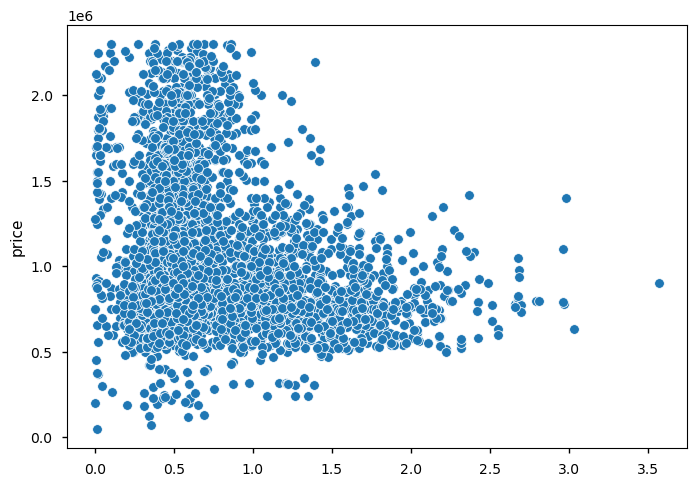

In [198]:
sns.scatterplot(x = df_new['sqft_living']/df_new['sqft_lot'], y= df_new['price'])

In [199]:
df_new.corrwith(df_new['sqft_living']/df_new['sqft_lot'])['price']

-0.2712203531633325

In [200]:
991/df_new.shape[0]

0.2841984513908804

In [201]:
df_new.corr()['price'].sort_values(ascending=False)

price             1.000000
sqft_living       0.584544
sqft_above        0.504575
bathrooms         0.478551
bedrooms          0.423555
ppsq_living       0.381096
sqft_garage       0.358359
sqft_basement     0.257713
Gas               0.240465
garage            0.239844
sqft_patio        0.229328
greenbelt         0.128112
sqft_lot          0.122000
basement          0.089256
waterfront        0.071921
patio             0.040278
Oil               0.000709
Other            -0.018441
index            -0.022120
nuisance         -0.025172
Solar            -0.035869
yr_built         -0.095147
ppsq_lot         -0.102293
zipcode          -0.135847
floors           -0.153045
Electricity      -0.233891
lot_home_ratio   -0.271216
avg_price              NaN
Name: price, dtype: float64

In [202]:
X = df_new[['lot_home_ratio', 'ppsq_living']]
y = df_new['price']
dummy_model = sm.OLS(y, sm.add_constant(X))
dummy_model.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     891.4
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          2.31e-313
Time:                        11:26:13   Log-Likelihood:                -49502.
No. Observations:                3487   AIC:                         9.901e+04
Df Residuals:                    3484   BIC:                         9.903e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.233e+05   1.74e+04     41.481      0.000    6.89e+05    7.58e+05
lot_home_ratio -4.029e+05   1.26e+04    -31.904      0.000   -4.28e+05   -3.78e+05
ppsq_living     1376.8539     36.859     37.355      0.000    1304.587    1449.121
==============================================================================
Omnibus:                      298.130   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1524.404
Skew:                           0.235   Prob(JB):                         0.00
Kurtosis:                       6.205   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [203]:
df_new['heat_source'].isin(['Electricity/Solar', 'Gas/Solar']).sum()

28

In [204]:
df_new['heat_source'].value_counts()

Gas                  2425
Electricity          1028
Electricity/Solar      16
Gas/Solar              12
Oil                     2
Other                   1
Name: heat_source, dtype: int64

In [205]:
df_new['heat_source_2'].value_counts()

Gas            2425
Electricity    1028
Solar            28
Oil               2
Other             1
Name: heat_source_2, dtype: int64

In [206]:
X = dummy_heat_df.drop(['avg_price', 'price', 'view', 'grade', 'heat_source', 'sewer_system', 'heat_source_2'], axis=1)
y = dummy_heat_df['price']
dummy_model = sm.OLS(y, sm.add_constant(X))
dummy_model.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     992.8
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:26:13   Log-Likelihood:                -46688.
No. Observations:                3487   AIC:                         9.342e+04
Df Residuals:                    3463   BIC:                         9.357e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.642e+07      8e+06      3.304      0.001    1.07e+07    4.21e+07
index             -0.0537      0.309     -0.174      0.862      -0.660       0.552
bedrooms        2.291e+04   4496.202      5.095      0.000    1.41e+04    3.17e+04
bathrooms       2984.4863   5970.300      0.500      0.617   -8721.177    1.47e+04
sqft_living      345.7806     23.799     14.529      0.000     299.119     392.442
sqft_lot          -0.2132      0.101     -2.116      0.034      -0.411      -0.016
floors          6925.6699   8403.213      0.824      0.410   -9550.084    2.34e+04
waterfront      6.856e+04   5.38e+04      1.275      0.202   -3.69e+04    1.74e+05
greenbelt       4.173e+04   1.62e+04      2.583      0.010    1.01e+04    7.34e+04
nuisance         3.29e+04   8223.460      4.000      0.000    1.68e+04     4.9e+04
sqft_above        84.9883     24.503      3.469      0.001      36.947     133.030
sqft_basement     86.6271     17.993      4.814      0.000      51.349     121.905
sqft_garage       11.8027     21.922      0.538      0.590     -31.179      54.785
sqft_patio         5.1396     16.786      0.306      0.759     -27.772      38.051
yr_built       -7494.6512   1023.603     -7.322      0.000   -9501.578   -5487.725
zipcode         -127.0036     75.555     -1.681      0.093    -275.141      21.134
ppsq_living     1963.9023     29.506     66.560      0.000    1906.051    2021.753
ppsq_lot          61.9327     36.278      1.707      0.088      -9.195     133.061
lot_home_ratio -4.116e+04   2.18e+04     -1.889      0.059   -8.39e+04    1561.284
Electricity     1.484e+05   9.22e+04      1.610      0.108   -3.23e+04    3.29e+05
Gas             1.528e+05    9.2e+04      1.661      0.097   -2.76e+04    3.33e+05
Oil            -1.929e+04   1.45e+05     -0.133      0.894   -3.04e+05    2.65e+05
Other           1.216e+05   1.84e+05      0.661      0.509   -2.39e+05    4.82e+05
Solar           2.892e+05    9.7e+04      2.983      0.003    9.91e+04    4.79e+05
==============================================================================
Omnibus:                     4192.561   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1586054.527
Skew:                          -5.895   Prob(JB):                         0.00
Kurtosis:                     106.814   Cond. No.                     2.97e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [207]:
X = dummy_heat_df.drop(['avg_price', 'price', 'view', 'grade', 'heat_source', 'sewer_system', 'heat_source_2',
                        'zipcode','ppsq_living', 'sqft_living', 'yr_built','greenbelt', 'ppsq_lot', 'bedrooms',
                         'sqft_lot', 'floors', 'lot_home_ratio', 'Electricity', 'Gas', 'Oil', 'Other', 'Solar',
                         'nuisance', 'waterfront', 'bathrooms'], axis=1)
y = dummy_heat_df['price']
dummy_model = sm.OLS(y, sm.add_constant(X))
dummy_model.fit().summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     474.7
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:26:13   Log-Likelihood:                -49316.
No. Observations:                3487   AIC:                         9.864e+04
Df Residuals:                    3481   BIC:                         9.868e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.171e+05   2.09e+04     10.376      0.000    1.76e+05    2.58e+05
index            -0.2065      0.654     -0.316      0.752      -1.488       1.075
sqft_above      340.7012     10.301     33.075      0.000     320.505     360.897
sqft_basement   367.3493     15.745     23.332      0.000     336.480     398.219
sqft_garage    -354.0028     38.532     -9.187      0.000    -429.551    -278.455
sqft_patio      369.5122     33.375     11.071      0.000     304.075     434.949
==============================================================================
Omnibus:                      240.366   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.432
Skew:                           0.428   Prob(JB):                    2.45e-121
Kurtosis:                       4.758   Cond. No.                     6.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [208]:
dummy_heat_df[['sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'price']].corr()

,sqft_above,sqft_basement,sqft_garage,sqft_patio,price
sqft_above,1.000000,-0.143211,0.760967,-0.017555,0.504575
sqft_basement,-0.143211,1.000000,0.068034,0.253784,0.257713
sqft_garage,0.760967,0.068034,1.000000,-0.033527,0.358359
sqft_patio,-0.017555,0.253784,-0.033527,1.000000,0.229328
price,0.504575,0.257713,0.358359,0.229328,1.000000


In [209]:
X = dummy_heat_df[['sqft_above', 'sqft_basement', 'sqft_patio']]
y = dummy_heat_df['price']
dummy_model = sm.OLS(y, sm.add_constant(X))
dummy_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     745.3
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:26:13   Log-Likelihood:                -49358.
No. Observations:                3487   AIC:                         9.872e+04
Df Residuals:                    3483   BIC:                         9.875e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.579e+05   1.78e+04     14.496      0.000    2.23e+05    2.93e+05
sqft_above      266.6787      6.484     41.132      0.000     253.967     279.391
sqft_basement   324.9544     15.229     21.338      0.000     295.097     354.812
sqft_patio      402.9986     33.566     12.006      0.000     337.188     468.809
==============================================================================
Omnibus:                      229.391   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              484.837
Skew:                           0.436   Prob(JB):                    5.24e-106
Kurtosis:                       4.605   Cond. No.                     7.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
X = dummy_heat_df[['sqft_living']]
y = dummy_heat_df['price']
dummy_model = sm.OLS(y, sm.add_constant(X))
dummy_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1809.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          9.48e-319
Time:                        11:26:13   Log-Likelihood:                -49494.
No. Observations:                3487   AIC:                         9.899e+04
Df Residuals:                    3485   BIC:                         9.900e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.549e+05    1.7e+04     20.930      0.000    3.22e+05    3.88e+05
sqft_living   282.9177      6.652     42.531      0.000     269.875     295.960
==============================================================================
Omnibus:                      152.693   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.749
Skew:                           0.461   Prob(JB):                     2.30e-42
Kurtosis:                       3.685   Cond. No.                     7.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [211]:
dummy_heat_df[['sqft_above', 'sqft_basement', 'sqft_patio', 'price']].corr()

,sqft_above,sqft_basement,sqft_patio,price
sqft_above,1.000000,-0.143211,-0.017555,0.504575
sqft_basement,-0.143211,1.000000,0.253784,0.257713
sqft_patio,-0.017555,0.253784,1.000000,0.229328
price,0.504575,0.257713,0.229328,1.000000


In [212]:
column_list = list(dummy_heat_df.columns)
column_list

['index',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'greenbelt',
 'nuisance',
 'view',
 'grade',
 'heat_source',
 'sewer_system',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'zipcode',
 'ppsq_living',
 'ppsq_lot',
 'avg_price',
 'lot_home_ratio',
 'heat_source_2',
 'Electricity',
 'Gas',
 'Oil',
 'Other',
 'Solar']

In [213]:
dummy_heat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           3487 non-null   int64  
 1   price           3487 non-null   float64
 2   bedrooms        3487 non-null   int64  
 3   bathrooms       3487 non-null   float64
 4   sqft_living     3487 non-null   int64  
 5   sqft_lot        3487 non-null   int64  
 6   floors          3487 non-null   float64
 7   waterfront      3487 non-null   int64  
 8   greenbelt       3487 non-null   int64  
 9   nuisance        3487 non-null   int64  
 10  view            3487 non-null   object 
 11  grade           3487 non-null   object 
 12  heat_source     3484 non-null   object 
 13  sewer_system    3480 non-null   object 
 14  sqft_above      3487 non-null   int64  
 15  sqft_basement   3487 non-null   int64  
 16  sqft_garage     3487 non-null   int64  
 17  sqft_patio      3487 non-null   i

<AxesSubplot:xlabel='sqft_garage', ylabel='price'>

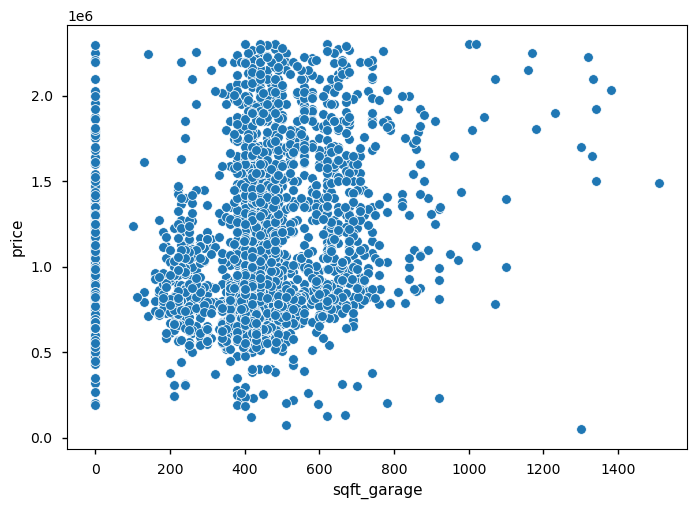

In [214]:
sns.scatterplot(x= df_new['sqft_garage'], y=df_new['price'])

In [215]:
len(garage_no_garage) == len(df_new)

True

In [216]:
df_new.corr()['price']['garage']

0.23984413351189673

In [217]:
X = df_new[['sqft_above', 'sqft_basement', 'garage', 'sqft_patio']]
y = df_new['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     599.3
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:26:14   Log-Likelihood:                -49309.
No. Observations:                3487   AIC:                         9.863e+04
Df Residuals:                    3482   BIC:                         9.866e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.778e+05   1.77e+04     15.733      0.000    2.43e+05    3.12e+05
sqft_above      319.9593      8.346     38.338      0.000     303.596     336.322
sqft_basement   367.5858     15.620     23.533      0.000     336.960     398.212
garage        -1.729e+05   1.74e+04     -9.935      0.000   -2.07e+05   -1.39e+05
sqft_patio      324.8677     34.026      9.548      0.000     258.155     391.580
==============================================================================
Omnibus:                      249.906   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              623.970
Skew:                           0.420   Prob(JB):                    3.21e-136
Kurtosis:                       4.894   Cond. No.                     7.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [218]:
df_new[['sqft_above', 'sqft_basement', 'garage', 'sqft_patio']].corr()

,sqft_above,sqft_basement,garage,sqft_patio
sqft_above,1.000000,-0.143211,0.608977,-0.017555
sqft_basement,-0.143211,1.000000,0.086351,0.253784
garage,0.608977,0.086351,1.000000,-0.139069
sqft_patio,-0.017555,0.253784,-0.139069,1.000000


<AxesSubplot:xlabel='sqft_above', ylabel='Count'>

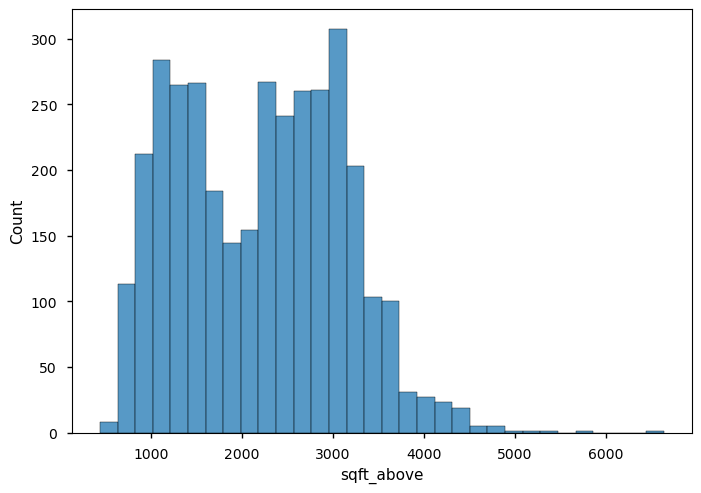

In [219]:
sns.histplot(df_new['sqft_above'])

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

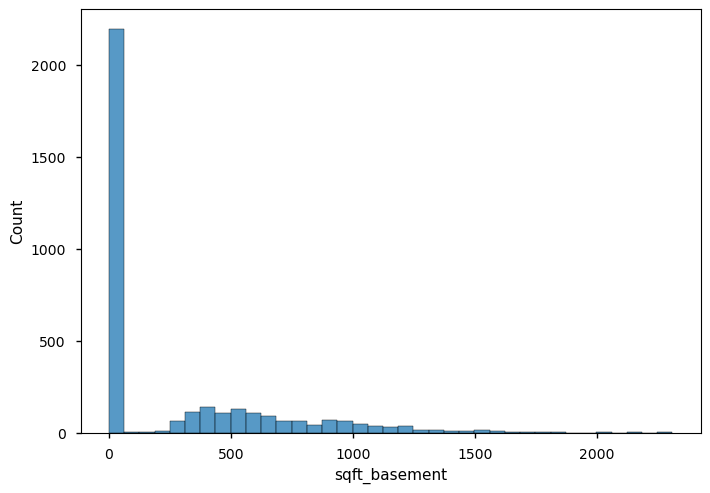

In [220]:
sns.histplot(df_new['sqft_basement'])

In [221]:
X = df_new[['sqft_above', 'basement', 'garage', 'sqft_patio']]
y = df_new['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     575.1
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:26:14   Log-Likelihood:                -49338.
No. Observations:                3487   AIC:                         9.869e+04
Df Residuals:                    3482   BIC:                         9.872e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.604e+05   1.96e+04      8.205      0.000    1.22e+05    1.99e+05
sqft_above   362.7237      9.218     39.350      0.000     344.651     380.796
basement    3.099e+05    1.4e+04     22.073      0.000    2.82e+05    3.37e+05
garage     -1.668e+05   1.75e+04     -9.505      0.000   -2.01e+05   -1.32e+05
sqft_patio   318.1589     34.590      9.198      0.000     250.340     385.978
==============================================================================
Omnibus:                      267.477   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.137
Skew:                           0.510   Prob(JB):                    9.41e-120
Kurtosis:                       4.653   Cond. No.                     8.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='sqft_patio', ylabel='Count'>

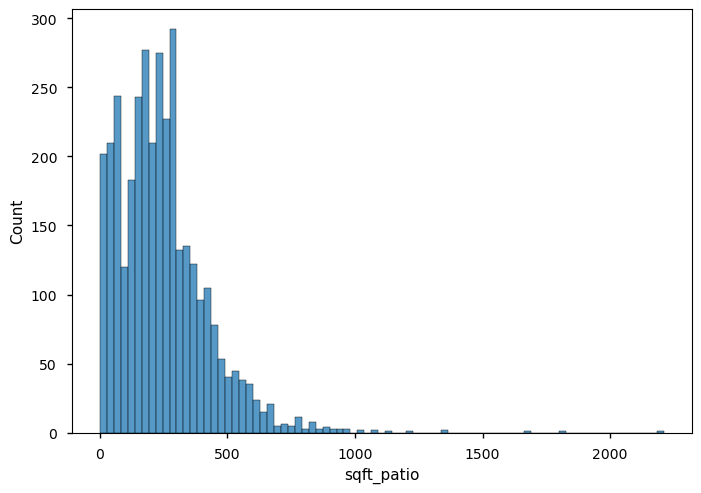

In [222]:
sns.histplot(df_new['sqft_patio'])

In [223]:
X = df_new[['sqft_above', 'basement', 'patio', 'garage']]
y = df_new['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     540.9
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:26:14   Log-Likelihood:                -49380.
No. Observations:                3487   AIC:                         9.877e+04
Df Residuals:                    3482   BIC:                         9.880e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.235e+05   3.12e+04      7.165      0.000    1.62e+05    2.85e+05
sqft_above   382.2125      9.091     42.043      0.000     364.388     400.037
basement    3.519e+05   1.34e+04     26.180      0.000    3.26e+05    3.78e+05
patio      -1.641e+04   2.77e+04     -0.593      0.553   -7.06e+04    3.78e+04
garage     -2.042e+05   1.73e+04    -11.813      0.000   -2.38e+05    -1.7e+05
==============================================================================
Omnibus:                      241.935   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              436.149
Skew:                           0.506   Prob(JB):                     1.96e-95
Kurtosis:                       4.406   Cond. No.                     1.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [224]:
X = df_new[['sqft_above', 'basement', 'garage']]
y = df_new['price']
model = sm.OLS(y, sm.add_constant(X))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     721.3
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:26:15   Log-Likelihood:                -49380.
No. Observations:                3487   AIC:                         9.877e+04
Df Residuals:                    3483   BIC:                         9.879e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.089e+05   1.91e+04     10.963      0.000    1.72e+05    2.46e+05
sqft_above   382.0046      9.083     42.055      0.000     364.195     399.814
basement    3.518e+05   1.34e+04     26.179      0.000    3.25e+05    3.78e+05
garage     -2.049e+05   1.73e+04    -11.878      0.000   -2.39e+05   -1.71e+05
==============================================================================
Omnibus:                      243.766   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.390
Skew:                           0.509   Prob(JB):                     2.35e-96
Kurtosis:                       4.413   Cond. No.                     8.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [225]:
df_new.sum()

C:\Users\DJ\AppData\Local\Temp\ipykernel_3216\2680099903.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_new.sum()


index                                                      52069641
price                                                  3590030935.0
bedrooms                                                      12464
bathrooms                                                    9720.5
sqft_living                                                 8315731
sqft_lot                                                   24918651
floors                                                       7558.0
waterfront                                                        9
greenbelt                                                       103
nuisance                                                        466
view              NONENONENONENONENONENONENONENONENONENONENONENO...
grade             8 Good9 Better8 Good8 Good8 Good8 Good8 Good8 ...
sqft_above                                                  7701480
sqft_basement                                                899934
sqft_garage                                     